<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Examen III</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Laboratorio de procesamiento de datos</center></b></font>
<br>
<!-- <br> -->


<b><font face = "Times New Roman" size = "4"><center> </center></font>
<!-- <font face = "Times New Roman" size = "4"><center>Subtema c: x</center></font></b> -->
<div align="right"><font face = "Times New Roman" size = "2">Eduardo Martínez</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Demien Becerra</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Ubaldo Neri</font></div>
</span></div>

### Instrucciones

A continuación los pasos a realizar. Lee con atención  y responde en tu notebook lo que se pide: 

1. Tomar el dataset dado.
2. Hacer un análisis descriptivo y agrupado de los datos. De este punto se espera que el alumno identifique las carencias de la base (información faltante y/o mal presentada) así como el potencial de las variables predictoras hacia la variable de respuesta (`client_stayed`).
    - Este punto trata de analizar el estado en el cual se recibe el conjunto de datos **y explicarlo de manera somera pero con gráficos/tablas que soporten conclusiones preliminares**.
        - Nota: Solamente nombrar columnas o decir que hay X números NO es un análisis descriptivo EDA.
    - Hacer análisis cruzados: Análisis entre varias variables y no solo de manera individual. **Se espera que hagas estos análisis y expliques qué se hace y qué observas en cada uno**.
3. Preprocesar los datos.
    - Se espera que se limpien y/o estandaricen según sea necesario en este punto del proceso.
    - Rellenar información faltante.
      - Explicar el porqué del método elegido.
      - Evaluar los impactos en el conjunto de datos del método elegido. Responder:
          - ¿La variable después de rellenar cambió su distribución de alguna forma?
          - ¿Cambiaron estadísticos como el promedio y la desviación estándar de la variable?
          - ¿Cambió la correlación de la variable con la variable objetivo?
    - Generar un proceso de feature engineering.
        - Crear nuevas variables a partir de las existentes Se deben de crear al menos 5 variables y agregarlas al DataFrame para poder hacer los análisis subsecuentes. Para cada variable creada responder: 
            - ¿Cuál es tu hipótesis? ¿Por qué esa variable puede servir?
            - Después de observar el potencial de la variable explica su comportamiento. ¿Qué observas de tu variable al ser comparada con la variable de respuesta?
        - **Se debe de cuidar que no haya leakage en ninguna de las variables producidas**.
    - Generar un proceso de selección de variables.
        - Se debe de escoger entre al menos una de las siguientes opciones:
            - Varianza.
            - Correlaciones.
            - Coeficientes de una regresión logística.
        - Responder:
            - ¿Cómo se implementó el método utilizado? 
            - ¿Por qué se escogió este método?
            - ¿Qué variables se van a seleccionar con el método?
            - ¿**Cómo puedo demostrar** que las variables elegidas son mejores que las no elegidas?
            - ¿Algunas de las variables generadas con el punto b quedaron elegidas? ¿Por qué?


### Variables

A continuación se adjunta una descripción breve de las variables y de su contenido.

1. `Clientnum`: Id único para el cliente.

2. `Client_stayed`: **Variable de respuesta**. Es 1 si el cliente sigue con el banco o 0 si el cliente decidió dejar de ser cliente.

3. `Customer_age`: Edad del cliente medida en años.

4. `Gender`: Género del cliente. `M` para hombres y `F` para mujeres.

5. `Dependent_count`: Número de dependientes económicos del cliente.

6. `Education_level`: Escolaridad del cliente.

7. `Marital_status`: Estado civil del cliente.

8. `Income_category`: El banco no cuenta con los salarios exactos de los clientes, por lo que esta variable representa un aproximado medio del salario del mismo medido en dólares estadounidenses.

9. `Card_category`: Tipo de instrumento de crédito que tiene el cliente.

10. `Months_on_book`: Periodo en el que el cliente ha estado activo (desde la activación de su instrumento de crédito).

11. `Total_relationship_count`: Número de productos del banco que tiene el cliente. El cliente no está limitado a solo tener su instrumento de crédito, puede tener relación con otras áreas del banco.

12. `Months_inactive_12_mon`: Número de meses que el cliente ha dejado de utilizar su instrumento de crédito en los últimos 12 meses.

13. `Contacts_count_12_mon`: Número de contactos telefónicos que ha hecho el cliente al banco en los últimos 12 meses.

14. `Credit_limit`: Límite del instrumento crediticio medido en dólares estadounidenses.

15. `Total_revolving_bal`: Balance total del instrumento crediticio (cantidad a pagar por el cliente).

16. `Total_trans_amt`: Dinero transaccionado a través del instrumento crediticio en los últimos 12 meses.

17. `Total_trans_ct`: Número de transacciones realizadas a través del instrumento crediticio en los últimos 12 meses.



### Imports

In [1]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('Estilo/toutl.mplstyle')
from style import *

### Data


In [2]:
df=pd.read_csv('Datos/examen3.csv')
df.head()

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28


In [3]:
df.shape

(10127, 17)

In [4]:
df.dtypes

clientnum                     int64
client_stayed                 int64
customer_age                  int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
income_category              object
card_category                object
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
contacts_count_12_mon         int64
credit_limit                float64
total_revolving_bal           int64
total_trans_amt               int64
total_trans_ct                int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [6]:
display(df.describe(include="O"))
df.describe()

,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,1666.6666666666667,Blue
freq,5358,3128,4687,3561,9436


,clientnum,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,4404.086304,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,3397.129254,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,510.000000,10.000000
25%,7.130368e+08,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,7.179264e+08,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,7.731435e+08,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,4741.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,18484.000000,139.000000


In [7]:
granularidad = df.nunique()
granularidad

clientnum                   10127
client_stayed                   2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 7
marital_status                  4
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
total_trans_amt              5033
total_trans_ct                126
dtype: int64

In [8]:
granularidad_por_grupo = df.groupby('client_stayed').nunique().transpose()
granularidad_por_grupo

client_stayed,0,1
clientnum,1627,8500
customer_age,42,45
gender,2,2
dependent_count,6,6
education_level,7,7
marital_status,4,4
income_category,6,6
card_category,4,4
months_on_book,44,44
total_relationship_count,6,6


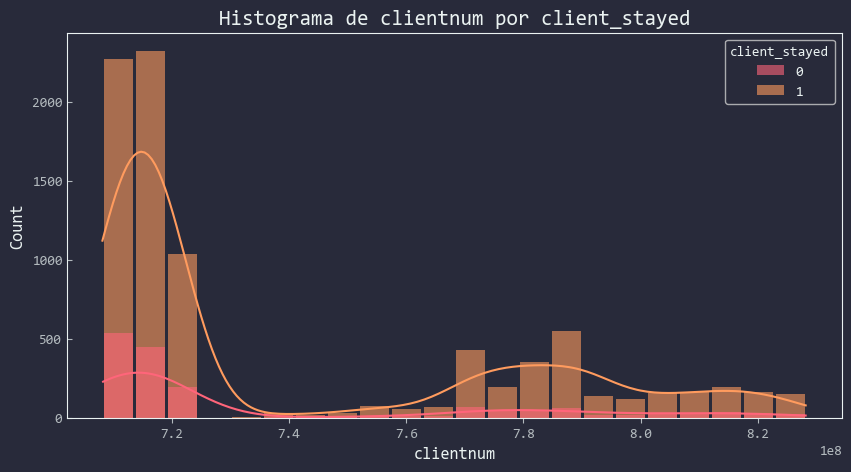

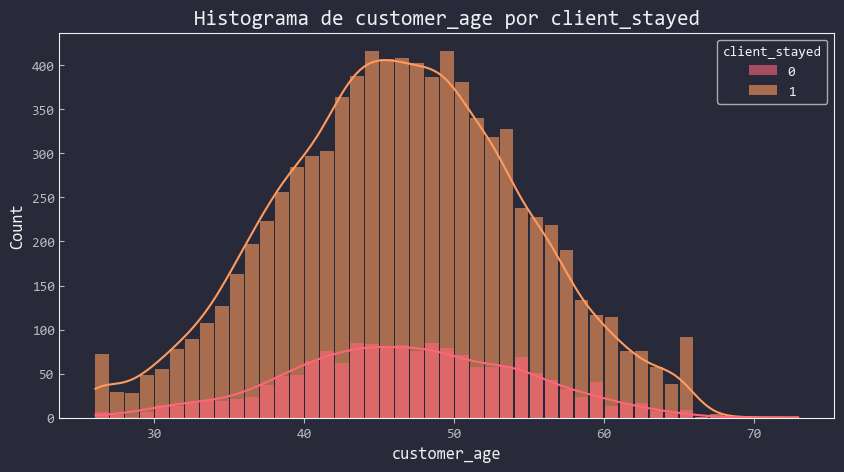

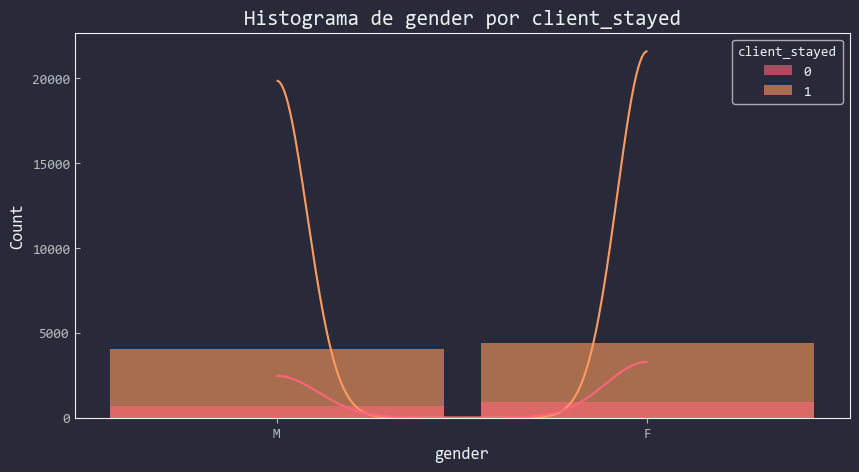

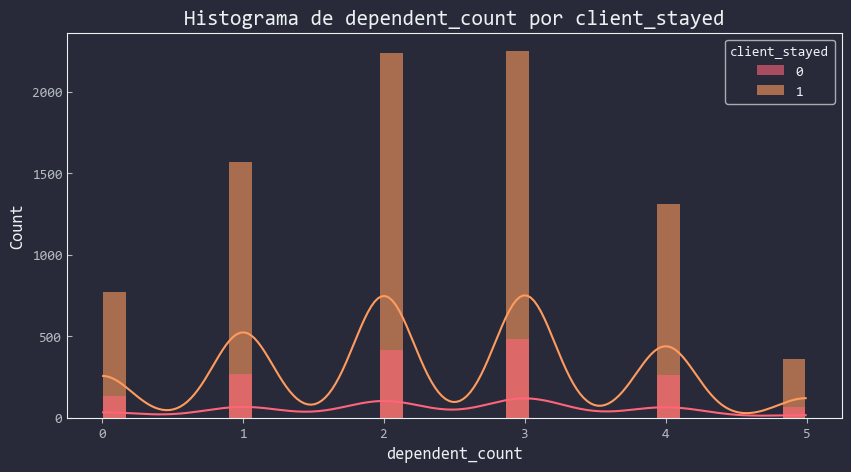

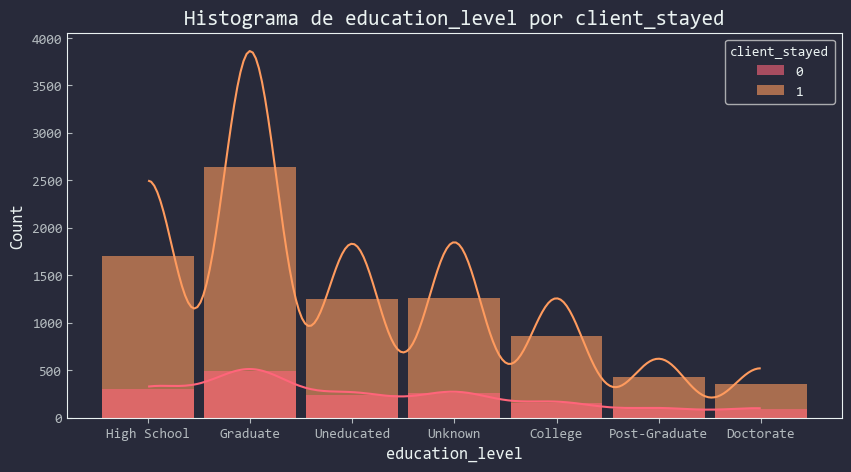

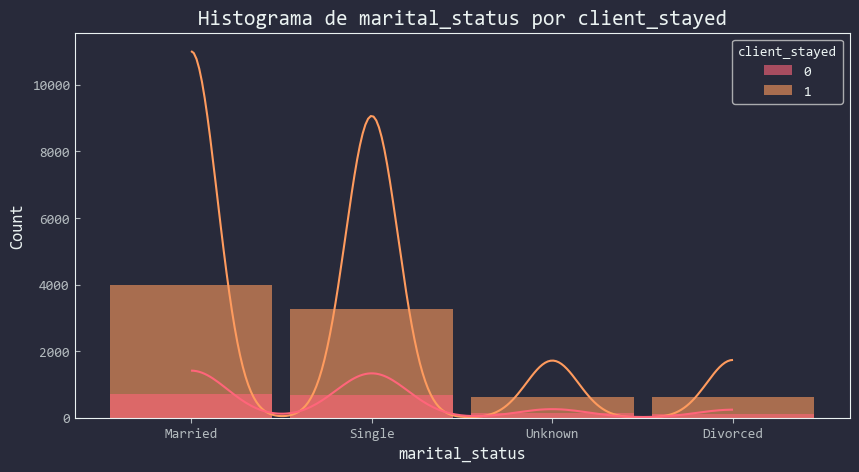

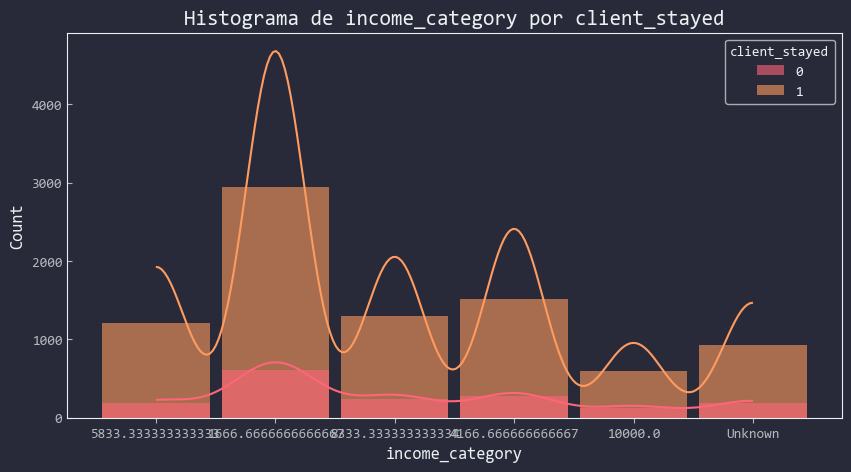

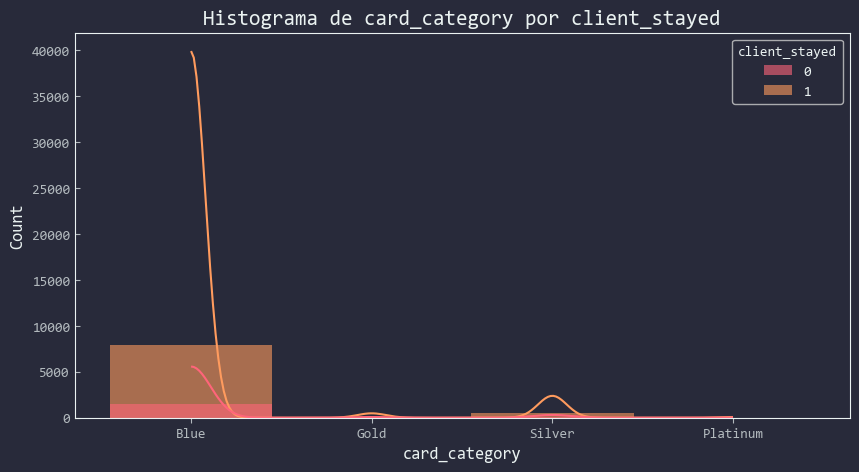

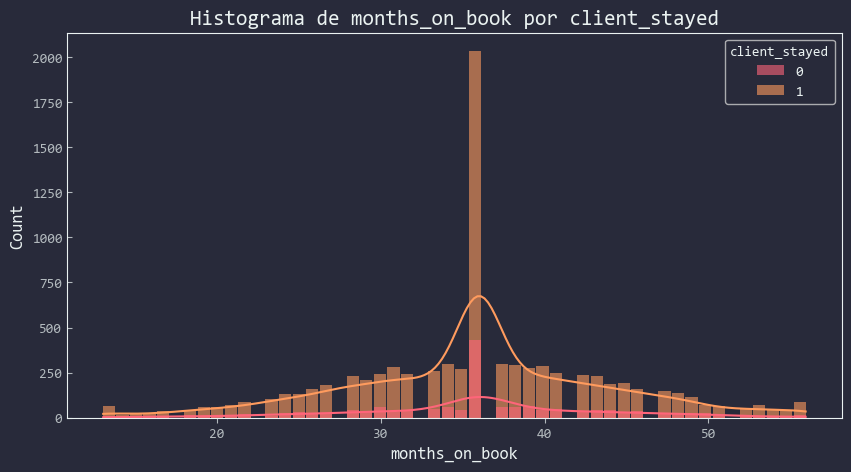

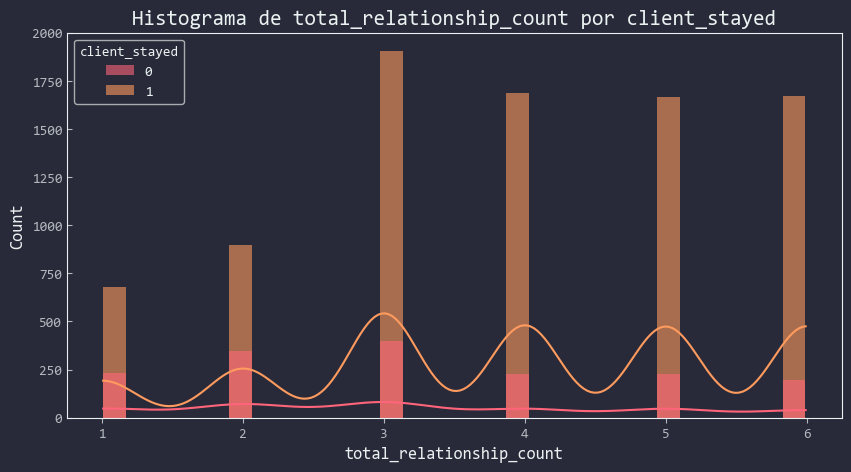

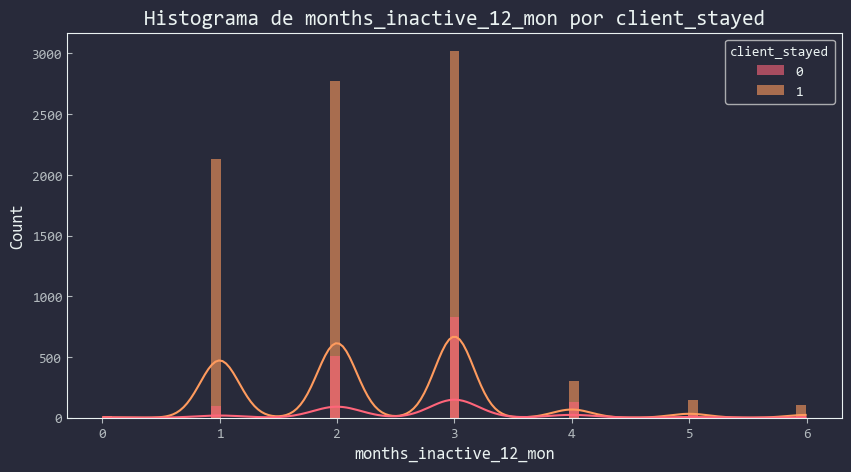

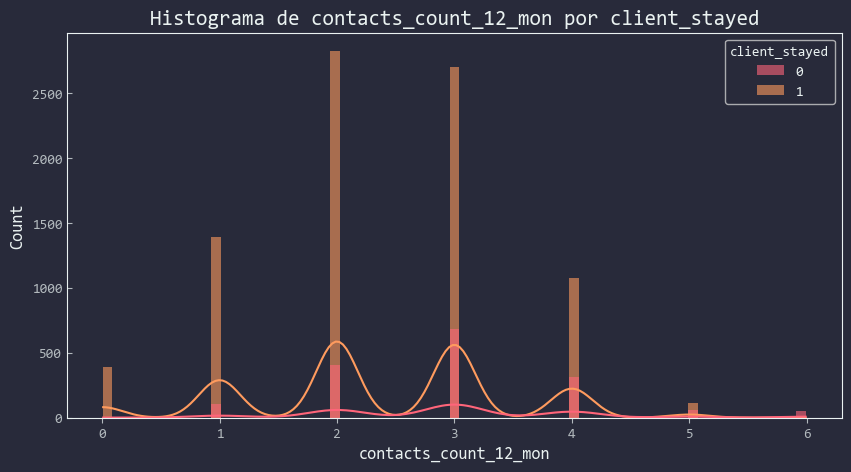

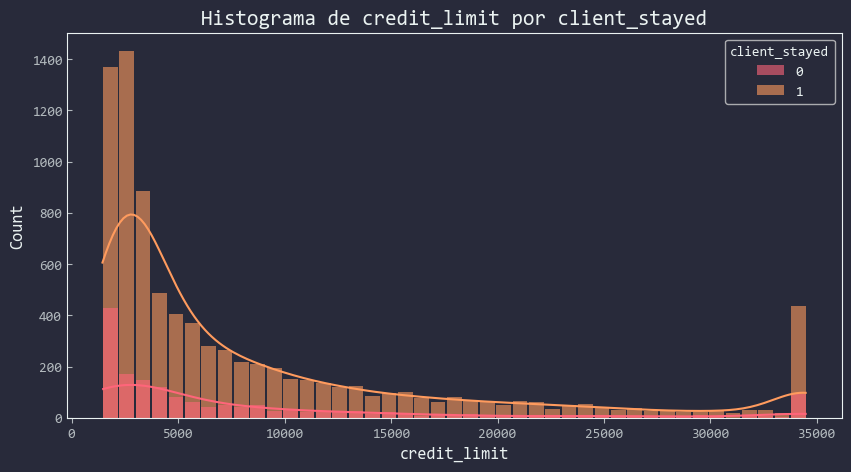

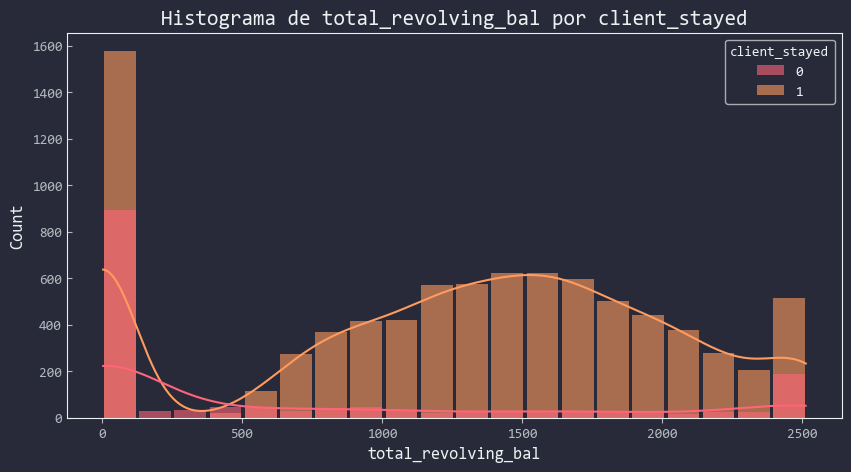

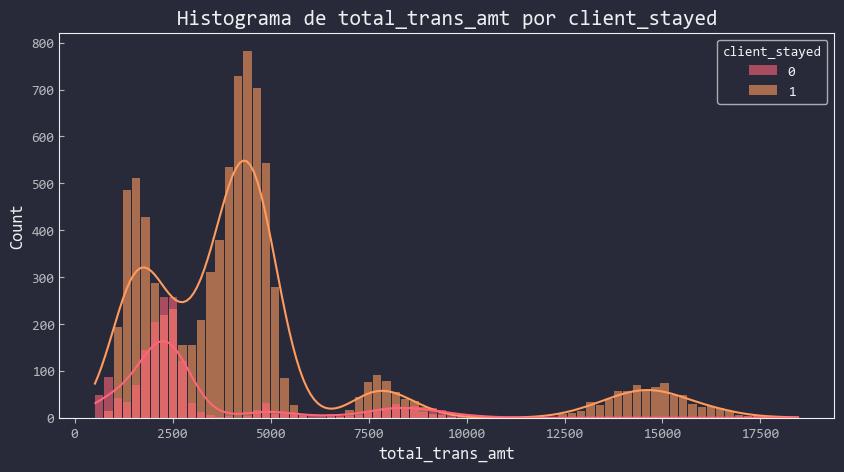

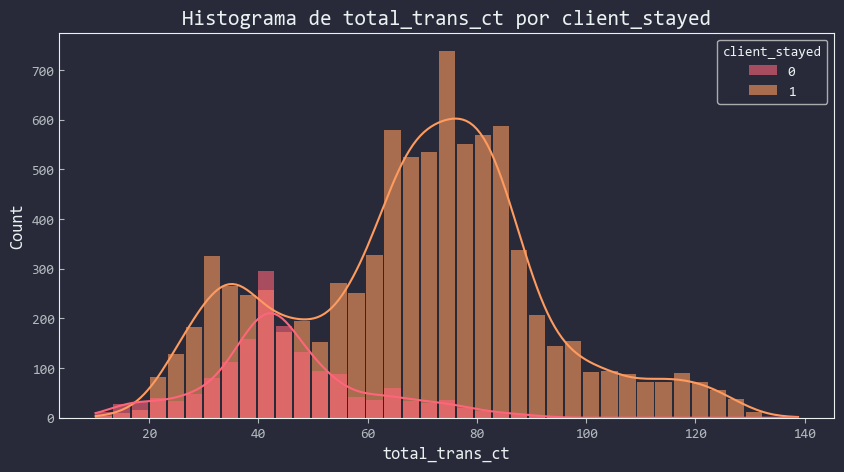

In [9]:
for column in df.columns:
    if column != 'client_stayed': 
        plt.figure(figsize=(10, 5))
        sns.histplot(
            data=df,
            x=column,
            hue='client_stayed',
            multiple='layer',  
            kde=True,         
            alpha=0.6,        
            edgecolor='none',
            shrink=0.9,
        )
        plt.title(f'Histograma de {column} por client_stayed')
        plt.show()

## "Unknown's"

In [10]:
granularidad_reducida = granularidad[granularidad < 10].drop(['client_stayed'])
granularidad_reducida

gender                      2
dependent_count             6
education_level             7
marital_status              4
income_category             6
card_category               4
total_relationship_count    6
months_inactive_12_mon      7
contacts_count_12_mon       7
dtype: int64

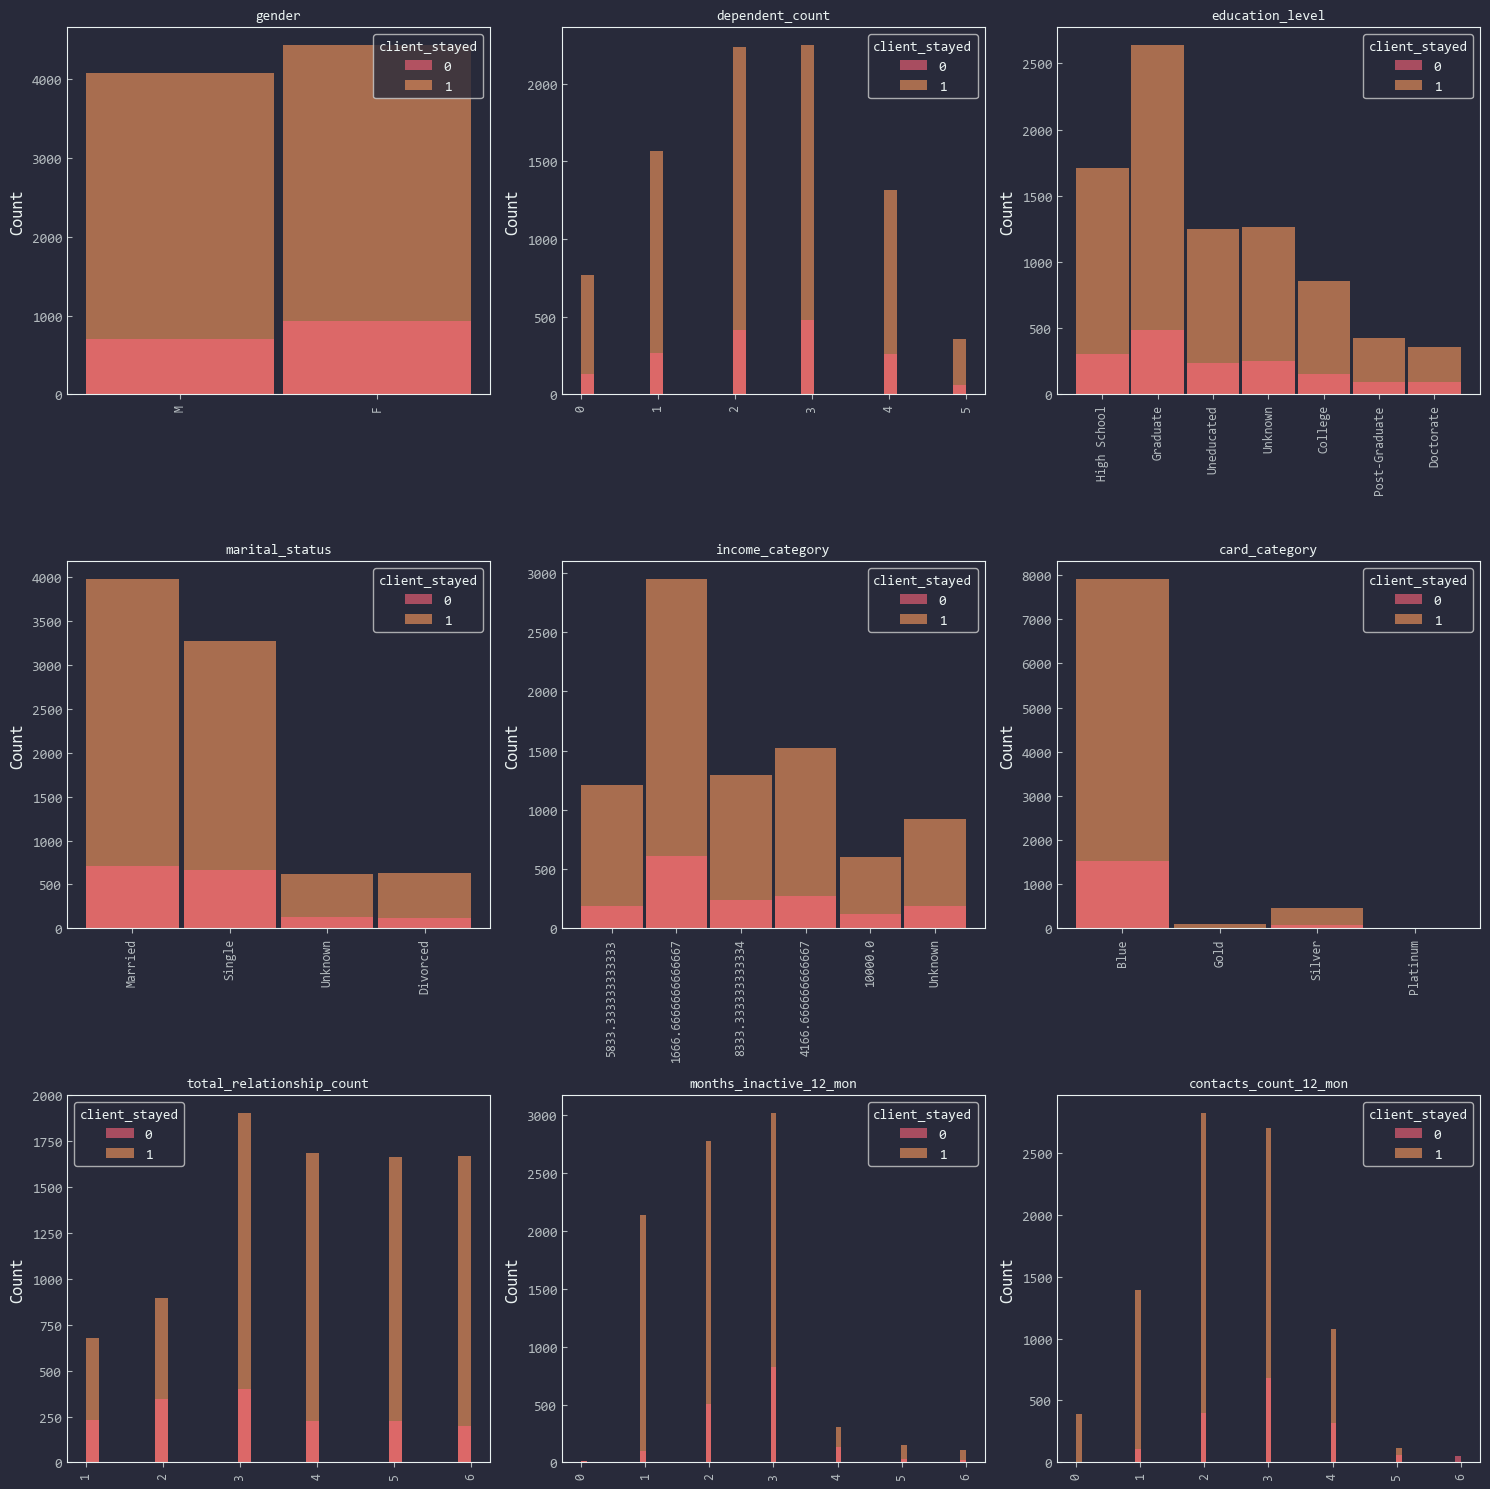

In [ ]:
fig,axes=plt.subplots(3,3, figsize=(15,15))

for ax, column in zip(axes.flat, granularidad_reducida.index):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.95)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()

#### Unknown aparece en tres variables

In [28]:
var_unknown = ["education_level", "marital_status", "income_category"]

df_vu = df[["client_stayed"] + var_unknown]
display(df_vu.head())

,client_stayed,education_level,marital_status,income_category
0,1,High School,Married,5833.333333333333
1,1,Graduate,Single,1666.6666666666667
2,1,Graduate,Married,8333.333333333334
3,1,High School,Unknown,1666.6666666666667
4,1,Uneducated,Married,5833.333333333333


In [91]:
results = {}

for var in var_unknown:
    proportions = df_vu.groupby(var)['client_stayed'].value_counts(normalize=True).unstack()
    
    results[var] = proportions
    
    print(f"\n=== Proportions by {var} ===")
    display(proportions.round(2))


=== Proportions by education_level ===


client_stayed,0,1
education_level,,
College,0.15,0.85
Doctorate,0.21,0.79
Graduate,0.16,0.84
High School,0.15,0.85
Post-Graduate,0.18,0.82
Uneducated,0.16,0.84
Unknown,0.17,0.83



=== Proportions by marital_status ===


client_stayed,0,1
marital_status,,
Divorced,0.16,0.84
Married,0.15,0.85
Single,0.17,0.83
Unknown,0.17,0.83



=== Proportions by income_category ===


client_stayed,0,1
income_category,,
10000.0,0.17,0.83
1666.6666666666667,0.17,0.83
4166.666666666667,0.15,0.85
5833.333333333333,0.13,0.87
8333.333333333334,0.16,0.84
Unknown,0.17,0.83


In [87]:
for var in var_unknown:
    print(df[var].value_counts(normalize=True)['Unknown'])

0.14999506270366347
0.07396069912116125
0.10980547052434086


In [83]:
for var in var_unknown:
    unknown_prop = results[var].loc['Unknown']
    other_prop = results[var].drop('Unknown').mean()

    print(var,f"Unknown: {unknown_prop[1]:.1%} stayed (1) vs. Known avg: {other_prop[1]:.1%} stayed")


education_level Unknown: 83.1% stayed (1) vs. Known avg: 83.2% stayed
marital_status Unknown: 82.8% stayed (1) vs. Known avg: 83.9% stayed
income_category Unknown: 83.2% stayed (1) vs. Known avg: 84.2% stayed
